In [1]:
# For data generation
import sys
# !{sys.executable} -m pip install matplotlib --upgrade
import shutil
import os
import numpy as np
from glob import glob
import re
import pandas as pd
import pickle
#random
from time import perf_counter

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV


#Plotting
import seaborn as sns
sns.set_style()
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 200

import warnings
# warnings.filterwarnings("ignore", category=np.DeprecationWarning) 


from tqdm.auto import tqdm
# from tqdm.notebook import tqdm_notebook as tqdm

In [2]:
# with open('drop.txt','r') as d:
#     dropfeat = [i.replace('\n','') for i in d.readlines()]

In [3]:
with open('test_ind.pickle', 'rb') as handle:
    test_ind = pickle.load(handle)

with open('train_ind.pickle', 'rb') as handle:
    train_ind = pickle.load(handle)
    
print(len(train_ind),len(test_ind))    


76 76


In [6]:
glob('ANO*/*')

['ANO-RCC-VDZP/ozone_140.50',
 'ANO-RCC-VDZP/ozone_155.00',
 'ANO-RCC-VDZP/ozone_135.50',
 'ANO-RCC-VDZP/ozone_145.00',
 'ANO-RCC-VDZP/ozone_142.00',
 'ANO-RCC-VDZP/ozone_150.50',
 'ANO-RCC-VDZP/ozone_170.50',
 'ANO-RCC-VDZP/ozone_116.50',
 'ANO-RCC-VDZP/ozone_159.50',
 'ANO-RCC-VDZP/ozone_176.00',
 'ANO-RCC-VDZP/ozone_126.50',
 'ANO-RCC-VDZP/ozone_169.50',
 'ANO-RCC-VDZP/ozone_128.00',
 'ANO-RCC-VDZP/ozone_115.50',
 'ANO-RCC-VDZP/ozone_143.00',
 'ANO-RCC-VDZP/ozone_172.00',
 'ANO-RCC-VDZP/ozone_152.50',
 'ANO-RCC-VDZP/ozone_129.00',
 'ANO-RCC-VDZP/ozone_177.00',
 'ANO-RCC-VDZP/ozone_172.50',
 'ANO-RCC-VDZP/ozone_117.00',
 'ANO-RCC-VDZP/ozone_158.00',
 'ANO-RCC-VDZP/ozone_181.00',
 'ANO-RCC-VDZP/ozone_138.50',
 'ANO-RCC-VDZP/ozone_114.00',
 'ANO-RCC-VDZP/ozone_139.00',
 'ANO-RCC-VDZP/ozone_161.50',
 'ANO-RCC-VDZP/ozone_112.00',
 'ANO-RCC-VDZP/ozone_125.50',
 'ANO-RCC-VDZP/ozone_125.00',
 'ANO-RCC-VDZP/ozone_171.50',
 'ANO-RCC-VDZP/ozone_143.50',
 'ANO-RCC-VDZP/ozone_110.50',
 'ANO-RCC-

In [13]:
train = []
test = []



recover_train = []
recover_test = []

traincnt = 0
testcnt = 0
for i in sorted(glob('ANO-RCC-MB')):
    if 'VTZP' not in i:
        print(i)
        for j in glob(os.path.join(i,'ozone_*')):
            for k in train_ind:
                if f"{k:.2f}" in j:
                    traindf = pd.read_csv(os.path.join(j,os.path.basename(j)+'.csv'),compression='zip',index_col=0)
                    train.append(traindf)
                    recover_train.append((i,f"{k:.2f}",traincnt,len(traindf)))
                    traincnt+=1
                    
            for l in test_ind:
                if f"{l:.2f}" in j:
                    testdf = pd.read_csv(os.path.join(j,os.path.basename(j)+'.csv'),compression='zip',index_col=0)
                    test.append(testdf)                    
                    recover_test.append((i,f"{l:.2f}",testcnt,len(testdf)))
                    testcnt+=1

ANO-RCC-MB


In [14]:
train_df = pd.concat(train)
#.drop(columns=dropfeat)
test_df = pd.concat(test)
#.drop(columns=dropfeat)

In [15]:
X_train = train_df.drop(columns=['Pair_Energies']).values
X_test = test_df.drop(columns=['Pair_Energies']).values

y_train = train_df['Pair_Energies'].values
y_test = test_df['Pair_Energies'].values

In [16]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
from xgboost import XGBRegressor

kwargs = 'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': np.nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 0.001,
 'reg_lambda': 0.001,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}
model=XGBRegressor(**kwargs)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print(f"R2: {r2_score(y_train,y_pred_train):.4f},{r2_score(y_test,y_pred_test):.4f}")
print(f"RMSE (mEh): {root_mean_squared_error(y_train,y_pred_train)*1e3:.4f},{root_mean_squared_error(y_test,y_pred_test)*1e3:.4f}")

# params = {'max_depth': [1, 10, 100],
#           'n_estimators': [100, 500, 1000],
#           'reg_lambda': [1e-6, 1e-3,1e-1],
#           'reg_alpha': [1e-6, 1e-3,1e-1]}

# model = XGBRegressor()
# grid = GridSearchCV(estimator=model, 
#                    param_grid=params,
#                    scoring='r2', 
#                    verbose=1000,n_jobs=12).fit(X_train,y_train)


# gmodel=grid.best_estimator_
# y_pred_train=gmodel.predict(X_train)
# y_pred_test=gmodel.predict(X_test)
# print(f"R2: {r2_score(y_train,y_pred_train):.4f},{r2_score(y_test,y_pred_test):.4f}")
# print(f"RMSE (mEh): {root_mean_squared_error(y_train,y_pred_train)*1e3:.4f},{root_mean_squared_error(y_test,y_pred_test)*1e3:.4f}")



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 2/5; 2/81] START max_depth=1, n_estimators=100, reg_alpha=1e-06, reg_lambda=0.001
[CV 2/5; 2/81] END max_depth=1, n_estimators=100, reg_alpha=1e-06, reg_lambda=0.001;, score=0.663 total time=   0.1s
[CV 3/5; 3/81] START max_depth=1, n_estimators=100, reg_alpha=1e-06, reg_lambda=0.1
[CV 3/5; 3/81] END max_depth=1, n_estimators=100, reg_alpha=1e-06, reg_lambda=0.1;, score=0.640 total time=   0.1s
[CV 1/5; 4/81] START max_depth=1, n_estimators=100, reg_alpha=0.001, reg_lambda=1e-06
[CV 1/5; 4/81] END max_depth=1, n_estimators=100, reg_alpha=0.001, reg_lambda=1e-06;, score=0.639 total time=   0.1s
[CV 1/5; 6/81] START max_depth=1, n_estimators=100, reg_alpha=0.001, reg_lambda=0.1
[CV 1/5; 6/81] END max_depth=1, n_estimators=100, reg_alpha=0.001, reg_lambda=0.1;, score=0.639 total time=   0.1s
[CV 3/5; 7/81] START max_depth=1, n_estimators=100, reg_alpha=0.1, reg_lambda=1e-06
[CV 3/5; 7/81] END max_depth=1, n_estimators=100, 

/home/grierjones/miniconda3/envs/DDGNN/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


R2: 0.9985,0.9965
RMSE (mEh): 0.1501,0.2265


In [22]:
try:
    os.mkdir('images')
except:
    print('./images exist')

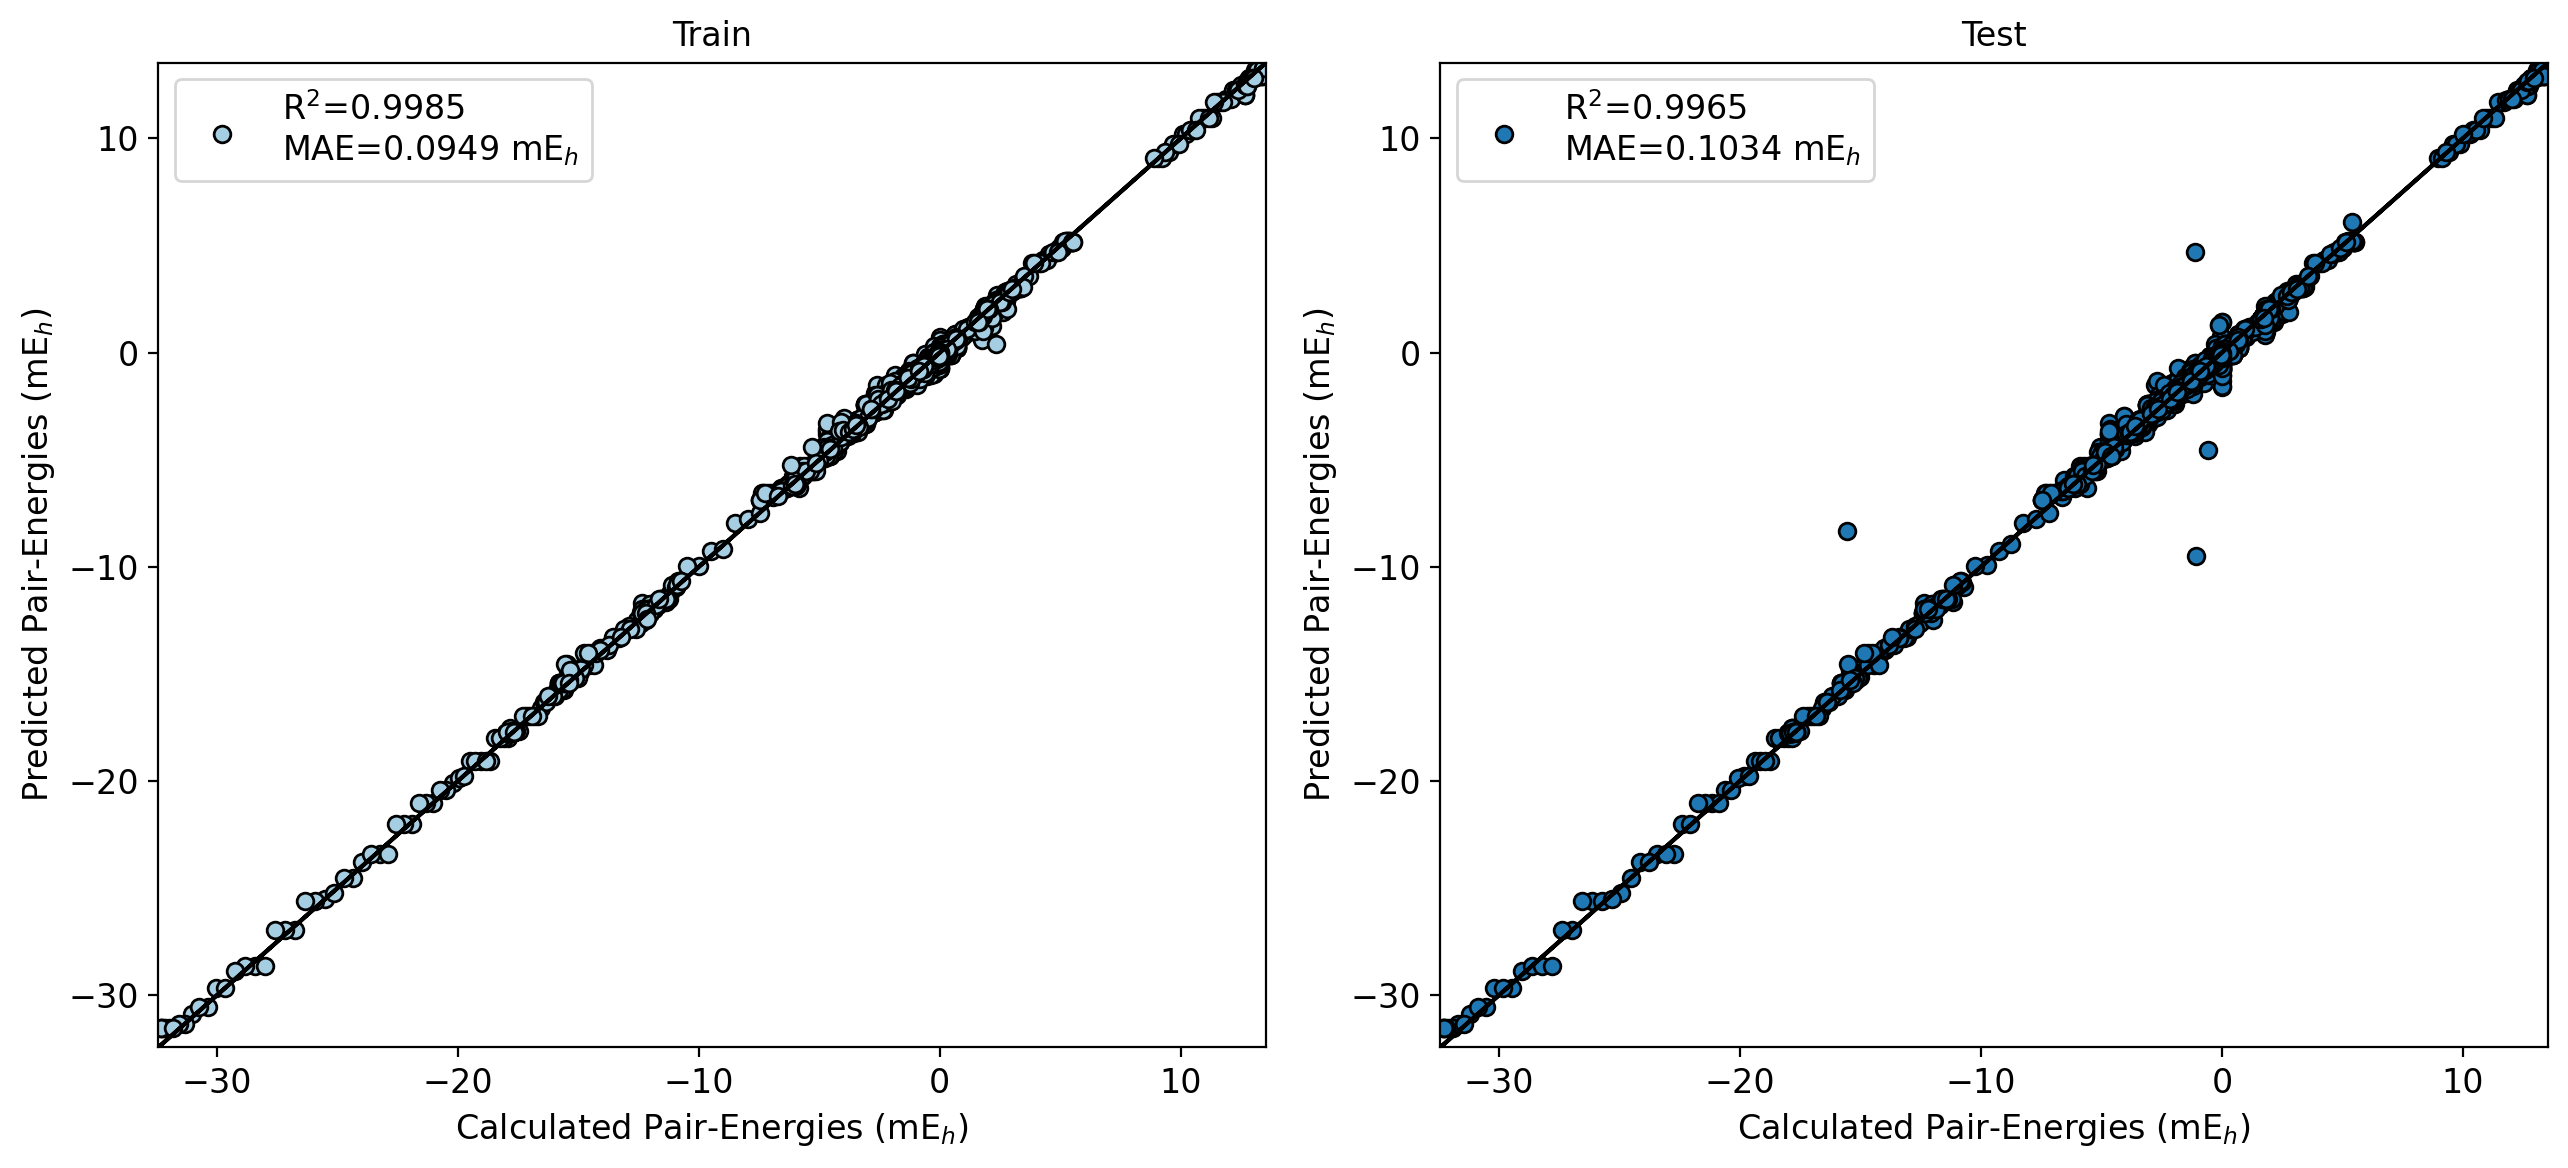

In [25]:
pal = sns.color_palette("Paired")
font=12
plt.rc('font', size=font)          # controls default text sizes
plt.rc('axes', titlesize=font)     # fontsize of the axes title
plt.rc('axes', labelsize=font)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font)    # fontsize of the tick labels
plt.rc('legend', fontsize=font)    # legend fontsize
plt.rc('figure', titlesize=font)  # fontsize of the figure title
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,6))
scale=1e-1
ax1.set_title('Train')
ax1.scatter(1e3*y_train,1e3*y_pred_train,label="R$^{2}$="+f'{r2_score(y_train,y_pred_train):.4f}\nMAE={1e3*mean_absolute_error(y_train,y_pred_train):.4f}'+" mE$_{h}$",color=pal[0],edgecolors='k')
ax1.plot(1e3*y_train,1e3*y_train,'k-')
ax1.set_xlim(1e3*min(y_train)-scale,1e3*max(y_train)+scale)
ax1.set_ylim(1e3*min(y_train)-scale,1e3*max(y_train)+scale)
ax1.set_xlabel('Calculated Pair-Energies (mE$_{h}$)')
ax1.set_ylabel('Predicted Pair-Energies (mE$_{h}$)')
ax1.legend()


ax2.set_title('Test')
ax2.scatter(1e3*y_test,1e3*y_pred_test,label="R$^{2}$="+f'{r2_score(y_test,y_pred_test):.4f}\nMAE={1e3*mean_absolute_error(y_test,y_pred_test):.4f}'+" mE$_{h}$",color=pal[1],edgecolors='k')
ax2.plot(1e3*y_test,1e3*y_test,'k-')
ax2.set_xlim(1e3*min(y_test)-scale,1e3*max(y_test)+scale)
ax2.set_ylim(1e3*min(y_test)-scale,1e3*max(y_test)+scale)
ax2.set_xlabel('Calculated Pair-Energies (mE$_{h}$)')
ax2.set_ylabel('Predicted Pair-Energies (mE$_{h}$)')
ax2.legend()

plt.tight_layout()
plt.savefig('images/ozone_MB_parity.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
testcntrcvr = 0
recover_test_list = []
recover_test_E2 = []
for i,j,k,l in recover_test:
    init_test = testcntrcvr
    testcntrcvr+=l
    recover_test_list.append((i.split("_")[0],j,y_test[init_test:testcntrcvr],y_pred_test[init_test:testcntrcvr]))
    recover_test_E2.append((i.split("_")[0],j,np.sum(y_test[init_test:testcntrcvr]),np.sum(y_pred_test[init_test:testcntrcvr])))


traincntrcvr = 0
recover_train_list = []
recover_train_E2 = []
for i,j,k,l in recover_train:
    init_train = traincntrcvr
    traincntrcvr+=l
    recover_train_list.append((i.split("_")[0],j,y_train[init_train:traincntrcvr],y_pred_train[init_train:traincntrcvr]))
    recover_train_E2.append((i.split("_")[0],j,np.sum(y_train[init_train:traincntrcvr]),np.sum(y_pred_train[init_train:traincntrcvr])))

In [ ]:
traincorrE2 = pd.DataFrame(recover_train_E2).rename(columns={0:'H$_{2n}$',1:'Radius ($\AA$)',2:'E$_{2}^{\text{Calculated}}$',3:'E$_{2}^{\text{Predicted}}$'})
#.astype({'H$_{2n}$':str,'Radius ($\AA$)':float,'E$_{2}^{\text{Calculated}}$':float,'E$_{2}^{\text{Predicted}}$':float})
testcorrE2 = pd.DataFrame(recover_test_E2).rename(columns={0:'H$_{2n}$',1:'Radius ($\AA$)',2:'E$_{2}^{\text{Calculated}}$',3:'E$_{2}^{\text{Predicted}}$'})
#.astype({'H$_{2n}$':str,'Radius ($\AA$)':float,'E$_{2}^{\text{Calculated}}$':float,'E$_{2}^{\text{Predicted}}$':float})


traincorrE2['CASPT2_E']=np.zeros(len(traincorrE2))
traincorrE2['CASSCF_E']=np.zeros(len(traincorrE2))
traincorrE2['E2']=np.zeros(len(traincorrE2))

traincorrE2.index = ["_".join((u,v)) for u,v in traincorrE2[['H$_{2n}$','Radius ($\AA$)']].values]

for i in traincorrE2.index:
    hn, r = i.split('_')
    energy_df = pd.read_excel(f"{hn}_chain/{hn}_{r}/{hn}_{r}_energies.xlsx",index_col=0)
    traincorrE2.loc[i,'CASPT2_E']=energy_df.loc['CASPT2_E'].values
    traincorrE2.loc[i,'CASSCF_E']=energy_df.loc['CASSCF_E'].values
    # traincorrE2.loc[i,'E2']=energy_df.loc['E2'].values

traincorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'] = traincorrE2['CASSCF_E']+traincorrE2['E$_{2}^{\text{Predicted}}$']

traincorrE2.rename(columns = {'CASPT2_E':'E$_{\text{CASPT2}}^{\text{Calculated}}$','CASSCF_E':'E$_{\text{CASSCF}}^{\text{Calculated}}$'},inplace=True)


testcorrE2['CASPT2_E']=np.zeros(len(testcorrE2))
testcorrE2['CASSCF_E']=np.zeros(len(testcorrE2))
testcorrE2['E2']=np.zeros(len(testcorrE2))

testcorrE2.index = ["_".join((u,v)) for u,v in testcorrE2[['H$_{2n}$','Radius ($\AA$)']].values]

for i in testcorrE2.index:
    hn, r = i.split('_')
    energy_df = pd.read_excel(f"{hn}_chain/{hn}_{r}/{hn}_{r}_energies.xlsx",index_col=0)
    testcorrE2.loc[i,'CASPT2_E']=energy_df.loc['CASPT2_E'].values
    testcorrE2.loc[i,'CASSCF_E']=energy_df.loc['CASSCF_E'].values
    # testcorrE2.loc[i,'E2']=energy_df.loc['E2'].values

testcorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'] = testcorrE2['CASSCF_E']+testcorrE2['E$_{2}^{\text{Predicted}}$']

testcorrE2.rename(columns = {'CASPT2_E':'E$_{\text{CASPT2}}^{\text{Calculated}}$','CASSCF_E':'E$_{\text{CASSCF}}^{\text{Calculated}}$'},inplace=True)

In [ ]:
traincaspt2melt = traincorrE2.melt(id_vars=['H$_{2n}$','Radius ($\AA$)'], value_vars=['E$_{\text{CASPT2}}^{\text{Calculated}}$','E$_{\text{CASPT2}}^{\text{Predicted}}$']).astype({'Radius ($\AA$)':float,'value':float})
testcaspt2melt = testcorrE2.melt(id_vars=['H$_{2n}$','Radius ($\AA$)'], value_vars=['E$_{\text{CASPT2}}^{\text{Calculated}}$','E$_{\text{CASPT2}}^{\text{Predicted}}$']).astype({'Radius ($\AA$)':float,'value':float})

In [ ]:
trueE2=pd.concat([traincorrE2,testcorrE2]).astype({'Radius ($\AA$)':float,'E$_{\text{CASPT2}}^{\text{Calculated}}$':float})

In [ ]:
mean_absolute_error(testcorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],testcorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])*1e3

In [ ]:
mean_absolute_error(traincorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],traincorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])*1e3

In [ ]:
pairedcp=sns.color_palette('Paired')

In [ ]:
try:
    os.mkdir('images')
except:
    print("./images exists")

In [ ]:
traincorrerr = {}
for n in sorted(set(traincaspt2melt['H$_{2n}$']),key=lambda x: int(x.replace("H",''))):
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10),sharey=True)
    
    pred_train,true_train = traincorrE2[traincorrE2['H$_{2n}$']==n]['E$_{\text{CASPT2}}^{\text{Predicted}}$'],traincorrE2[traincorrE2['H$_{2n}$']==n]['E$_{\text{CASPT2}}^{\text{Calculated}}$']
    pred_test,true_test = testcorrE2[testcorrE2['H$_{2n}$']==n]['E$_{\text{CASPT2}}^{\text{Predicted}}$'],testcorrE2[testcorrE2['H$_{2n}$']==n]['E$_{\text{CASPT2}}^{\text{Calculated}}$']
    testrad = testcorrE2[testcorrE2['H$_{2n}$']==n]['Radius ($\AA$)']    
    train_r2_corr = r2_score(true_train,pred_train)
    test_r2_corr = r2_score(true_test,pred_test)
    test_mae_corr = 1e3*mean_absolute_error(true_test,pred_test)
    train_mae_corr = 1e3*mean_absolute_error(true_train,pred_train)
    
    traincorrerr[n] = {"r2_train":train_r2_corr,"r2_test":test_r2_corr,"mae_train":train_mae_corr,"mae_test":test_mae_corr}
    trainrad = traincorrE2[traincorrE2['H$_{2n}$']==n]['Radius ($\AA$)']

    
    ax1.scatter(true_train,pred_train,label='R$^{2}$='+f'{train_r2_corr:.4f}\nMAE={train_mae_corr:.2e}'+" mE$_{h}$",color=pairedcp[4],edgecolors='k')
    ax1.plot(true_train,true_train,'k')
    ax1.set_xlabel('Calculated CASPT2 Energy (E$_{h}$)')
    ax1.set_ylabel('Predicted CASPT2 Energy (E$_{h}$)')
    ax1.set_title('Train')
    ax1.legend()


    ax2.scatter(true_test,pred_test,label='R$^{2}$='+f'{test_r2_corr:.4f}\nMAE={test_mae_corr:.2e}'+" mE$_{h}$",color=pairedcp[5],edgecolors='k')
    ax2.plot(true_test,true_test,'k')
    ax2.set_xlabel('Calculated CASPT2 Energy (E$_{h}$)')
    ax2.set_ylabel('Predicted CASPT2 Energy (E$_{h}$)')
    ax2.set_title('Test')    
    ax2.legend()
    
    ax3.scatter(np.array(trainrad,dtype=float),pred_train,color=pairedcp[4],edgecolors='k')
    ax3.plot(trueE2[trueE2['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['Radius ($\AA$)'],trueE2[trueE2['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['E$_{\text{CASPT2}}^{\text{Calculated}}$'],'k')
    ax3.set_xlabel('Radius (Å)')
    ax3.set_ylabel('CASPT2 Energy (E$_{h}$)')
    ax3.set_title('Train')
    
    ax4.scatter(np.array(testrad,dtype=float),pred_test,color=pairedcp[5],edgecolors='k')
    ax4.plot(trueE2[trueE2['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['Radius ($\AA$)'],trueE2[trueE2['H$_{2n}$']==n].sort_values(by='Radius ($\AA$)')['E$_{\text{CASPT2}}^{\text{Calculated}}$'],'k')
    ax4.set_xlabel('Radius (Å)')
    ax4.set_ylabel('CASPT2 Energy (E$_{h}$)')
    ax4.set_title('Test') 

    fig.suptitle("O$_{3}$ ANO-RCC-MB")
    
    plt.subplots_adjust(wspace=0.05)
    plt.tight_layout()
    plt.savefig(f'images/{n}_CASPT2.png',dpi=300,bbox_inches='tight')
    plt.show()    

In [ ]:
trainpairdf = pd.DataFrame(recover_train_list)
testpairdf = pd.DataFrame(recover_test_list)
pairerr={}
for n in sorted(set(traincaspt2melt['H$_{2n}$']),key=lambda x: int(x.replace("H",''))):
    print(n)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5),sharey=True)
    
    truetrainpair, predtrainpair = np.hstack(trainpairdf[trainpairdf[0]==n][2]),np.hstack(trainpairdf[trainpairdf[0]==n][3])
    train_r2_pair = r2_score(truetrainpair, predtrainpair)
    train_mae_pair = 1e3*mean_absolute_error(truetrainpair, predtrainpair)
    ax1.scatter(truetrainpair, predtrainpair,label='R$^{2}$='+f'{train_r2_pair:.4f}\nMAE={train_mae_pair:.2e}'+" mE$_{h}$",color=pairedcp[4],edgecolors='k')
    ax1.set_xlabel('Calculated E$_2$ Energy (E$_{h}$)')
    ax1.set_ylabel('Predicted E$_2$ Energy (E$_{h}$)')
    ax1.set_title('Test')    
    ax1.legend()  
    
    truetestpair, predtestpair = np.hstack(testpairdf[testpairdf[0]==n][2]),np.hstack(testpairdf[testpairdf[0]==n][3])
    test_r2_pair = r2_score(truetestpair, predtestpair)
    test_mae_pair = 1e3*mean_absolute_error(truetestpair, predtestpair)
    ax2.scatter(truetestpair, predtestpair,label='R$^{2}$='+f'{test_r2_pair:.4f}\nMAE={test_mae_pair:.2e}'+" mE$_{h}$",color=pairedcp[5],edgecolors='k')
    ax2.set_xlabel('Calculated E$_2$ Energy (E$_{h}$)')
    ax2.set_ylabel('Predicted E$_2$ Energy (E$_{h}$)')
    ax2.set_title('Test')    
    ax2.legend()    
    fig.suptitle("O$_{3}$ ANO-RCC-MB")
    plt.tight_layout()
    plt.savefig(f'images/{n}_E2.png',dpi=300,bbox_inches='tight')    
    plt.show()
    pairerr[n] = {"r2_train":train_r2_pair,"r2_test":test_r2_pair,"mae_train":train_mae_pair,"mae_test":test_mae_pair}

In [ ]:
meltcorrerr = pd.DataFrame.from_dict(traincorrerr).loc[['mae_train','mae_test']].T.rename(columns={'mae_train':'Train','mae_test':'Test'}).reset_index().melt(id_vars=['index'], value_vars=['Train','Test'])
meltpairerr = pd.DataFrame.from_dict(pairerr).loc[['mae_train','mae_test']].T.rename(columns={'mae_train':'Train','mae_test':'Test'}).reset_index().melt(id_vars=['index'], value_vars=['Train','Test'])
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5),sharey=True)
sns.barplot(data=meltpairerr,x='index',y='value',hue='variable',palette=pairedcp[4:6],ax=ax1)
ax1.set_ylabel('Mean Absolute Error (mE$_{h}$)')
ax1.set_xlabel('Structures')
ax1.set_title('Pair-Energies')
ax1.set_ylim(0,2.5)
sns.barplot(data=meltcorrerr,x='index',y='value',hue='variable',palette=pairedcp[4:6],ax=ax2)
# ax2.set_ylabel('Mean Absolute Error (mE$_{h}$)')
ax2.set_ylabel('')
ax2.set_xlabel('Structures')
ax2.set_title('Correlation Energies')

plt.tight_layout()
plt.savefig('images/MAE_bar.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
import shap
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)



In [ ]:
dffeat=pd.DataFrame(shap_values.abs.values.mean(axis=0),index=train_df.drop(columns=['Pair_Energies']).columns,columns=['shap']).rename(index={'1':'$\mathbf{b}$'}).reset_index().rename(columns={'index':'feat'}).sort_index().sort_values(by=['shap','feat'],ascending=False)
# dffeat['rename']=len(dffeat)*[1]


In [ ]:
with open('feature_names.txt','w') as f:
    for i in dffeat['feat'].values:
        f.write(i+'\n')

# with open('feature_names.txt','w') as f:
#     for i in dffeat['feat'].values:
#         f.write(i+'\n')

In [ ]:
dffeat.shape[0]/3,np.linspace(0,dffeat.shape[0],4)

In [ ]:
color_map=sns.color_palette('rocket',6)
fontsize = 12
fig, ax = plt.subplots(1,3,figsize=(15,12))
for idx, i in enumerate([[ 0,  32], [42,  64], [64, 96]]):
    print(idx,i)
    feat_1 = dffeat.iloc[i[0]:i[1]]
    ax[idx]=feat_1.sort_values(by=['shap','feat']).plot.barh(x='feat',y='shap',legend=False,color=color_map[3],fontsize=fontsize,ax=ax[idx])
    ax[idx].bar_label(ax[idx].containers[0], fmt='%.4e',fontsize=fontsize,padding=1)
    ax[idx].set_xlim(0,5e-4)
    ax[idx].set_xticks(np.linspace(0,5e-4,4),[f"{i:.2e}" for i in np.linspace(0,5e-4,4)])
    ax[idx].set_ylabel('Features',fontsize=fontsize)
    ax[idx].set_xlabel('mean(|SHAP value|)',fontsize=fontsize)

fig.subplots_adjust(wspace=0, hspace=0)

plt.tight_layout()
plt.savefig('images/Hn_shap_bar.png',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# # plt.figure(figsize=(8,13))
# color_map=sns.color_palette('rocket',6)
# fontsize = 5

# feat_2 = dffeat.sort_values(by=['shap','feat']).iloc[:63]
# feat_1 = dffeat.sort_values(by=['shap','feat']).iloc[63:]


# ax1=feat_1.sort_values(by=['shap','feat']).plot.barh(x='feat',y='shap',legend=False,color=color_map[3],fontsize=fontsize,ax=ax1)
# ax1.bar_label(ax1.containers[0], fmt='%.4e',fontsize=fontsize,padding=1)
# ax1.set_xlim(0,5e-4)
# ax1.set_xticks(np.linspace(0,5e-4,4),[f"{i:.2e}" for i in np.linspace(0,5e-4,4)])
# ax1.set_ylabel('Features',fontsize=fontsize)
# ax1.set_xlabel('mean(|SHAP value|)',fontsize=fontsize)

# ax2=feat_2.sort_values(by=['shap','feat']).plot.barh(x='feat',y='shap',legend=False,color=color_map[3],fontsize=fontsize,ax=ax2)
# ax2.bar_label(ax2.containers[0], fmt='%.4e',fontsize=fontsize,padding=1)
# ax2.set_xlim(0,5e-4)
# ax2.set_xticks(np.linspace(0,5e-4,4),[f"{i:.2e}" for i in np.linspace(0,5e-4,4)])
# ax2.set_ylabel('')
# ax2.set_xlabel('mean(|SHAP value|)',fontsize=fontsize)

# plt.tight_layout()
# # os.mkdir('images')
# plt.savefig('images/Hn_shap_bar.png',dpi=300, bbox_inches='tight')
# plt.show()

